In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [2]:
df = pd.read_csv('practice.csv')

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)


In [8]:
df

,input_1,input_2,output
0,-0.158986,0.423977,1.0
1,-0.347926,0.470760,1.0
2,-0.504608,0.353801,1.0
3,-0.596774,0.114035,1.0
4,-0.518433,-0.172515,1.0
...,...,...,...
206,-0.399885,-0.621930,1.0
207,-0.124078,-0.126608,1.0
208,-0.316935,-0.228947,1.0
209,-0.294124,-0.134795,0.0


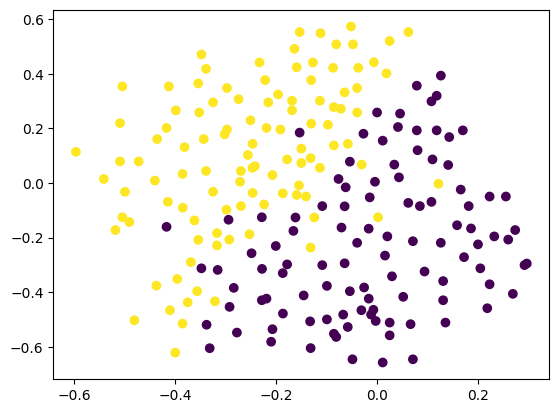

In [12]:
plt.scatter(x=df['input_1'],y=df['input_2'],c=df['output'])

In [13]:
X = df.iloc[:100,0:2].values
y = df.iloc[:100,-1].values

<Axes: >

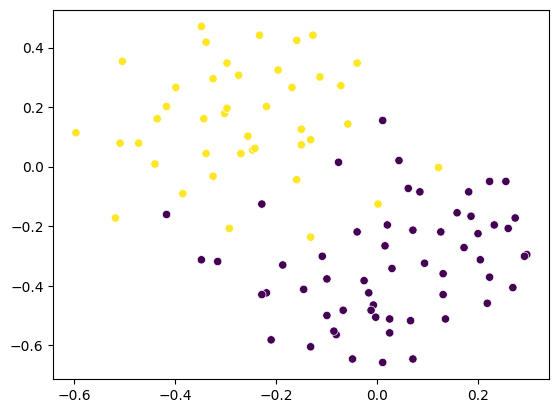

In [22]:
sns.scatterplot(x=X[:,0],y=X[:,-1],c=y[:])

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input

In [29]:
#always use he with relu

model = Sequential([
                      Input(shape=(2,)),
    Dense(10,activation='relu',kernel_initializer='he_normal'),
    Dense(10,activation='relu',kernel_initializer='he_normal'),
    Dense(10,activation='relu',kernel_initializer='he_normal'),
    Dense(10,activation='relu',kernel_initializer='he_normal'),
    Dense(1,activation='sigmoid')
])
model.summary()

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.get_weights()

[array([[-0.83830184,  2.1513891 , -1.8158363 , -0.7024058 , -0.29269284,
          1.343933  ,  0.486666  , -2.0019422 ,  1.0906533 ,  0.4629376 ],
        [ 1.6209147 ,  0.90117663,  0.64848435,  0.85881394, -0.5678058 ,
          0.05857687, -0.23329371, -0.75840974,  0.78105015,  1.510985  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.7216785 , -0.02191257,  0.6498991 ,  0.65151143, -0.39640012,
         -0.09594449, -0.03246379,  0.03740673, -0.71729463, -0.11970592],
        [ 0.44037595,  0.9137642 , -0.08198018, -0.07774991,  0.16157326,
         -0.36981517,  0.27085596, -0.1886295 , -0.63800097, -0.42917034],
        [ 0.32329032,  0.33507174, -0.56230414,  0.42182505, -0.51339114,
          0.4154891 , -0.48094392,  0.22811268, -0.3587985 , -0.08654392],
        [ 0.5150902 ,  0.76020676,  0.3953216 ,  0.04305639,  0.3766571 ,
          0.7746176 ,  0.3736292 ,  0.03586025, -0.21286036,  0.84311366],
        [-0.39506

In [32]:
initial_weights = model.get_weights()

In [33]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [34]:
model.set_weights(initial_weights)

In [35]:
model.get_weights()

[array([[-0.87177575, -0.00419141,  0.35141647, -0.89828575, -1.1367127 ,
          0.67415243,  0.10599247,  0.8911395 , -0.61386603, -0.46491683],
        [ 0.30494103, -0.75457805,  0.33738872, -0.034914  ,  1.0699614 ,
         -0.10465822,  1.3732888 ,  1.1427133 , -0.06098861, -1.2013578 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.42976907, -0.33438048,  0.19746748, -0.33622798,  0.11716244,
          0.60061103, -0.00608503, -0.12304804,  0.32135558,  0.41785377],
        [-0.0019665 ,  0.09829896,  0.04745531,  0.19274671, -0.13938087,
         -0.0308942 , -0.18210292, -0.10800487,  0.21903782,  0.17222689],
        [-0.05616407,  0.8864694 , -0.26663163,  0.05154838, -0.0623587 ,
         -0.5280769 ,  0.24384941, -0.15800385,  0.24670433, -0.50181276],
        [ 0.02892583, -0.06707873, -0.27722457, -0.11339306,  0.5383163 ,
         -0.72132415,  0.39785615, -0.18247966, -0.0347075 , -0.2586421 ],
        [ 0.18456

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.2750 - loss: 0.6976 - val_accuracy: 0.9500 - val_loss: 0.6831
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4000 - loss: 0.6939 - val_accuracy: 1.0000 - val_loss: 0.6840
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6250 - loss: 0.6905 - val_accuracy: 0.9000 - val_loss: 0.6847
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8625 - loss: 0.6873 - val_accuracy: 0.9000 - val_loss: 0.6849
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9000 - loss: 0.6841 - val_accuracy: 0.9000 - val_loss: 0.6848
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9000 - loss: 0.6810 - val_accuracy: 0.9000 - val_loss: 0.6842
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9000 - loss: 0.6781 - val_accuracy: 0.9000 - val_loss: 0.6830
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9125 - loss: 0.6750 - val_accuracy: 0.9000 - val_loss

In [38]:
model.get_weights()

[array([[-1.0467031 ,  0.1413017 ,  0.59779924, -0.8035114 , -1.2409205 ,
          0.758711  , -0.15509668,  0.80140096, -0.7782778 , -0.3044854 ],
        [ 0.46884143, -0.9697764 ,  0.13341974, -0.20156674,  1.2034127 ,
         -0.36396036,  1.5412039 ,  1.3563707 ,  0.06520885, -1.4285121 ]],
       dtype=float32),
 array([ 0.16744791,  0.19026804,  0.09953915, -0.13663152, -0.01911892,
         0.21355411,  0.17399919,  0.16777353,  0.04835262,  0.10566963],
       dtype=float32),
 array([[-0.3549471 , -0.34995112,  0.31107754, -0.22084124,  0.31393093,
          0.8011049 ,  0.06119767,  0.06716593,  0.5428204 ,  0.6140368 ],
        [ 0.25799847,  0.06090657,  0.22024356,  0.41540354, -0.19765559,
         -0.11339162, -0.00808551, -0.04469372,  0.08851693,  0.07290094],
        [ 0.23423244,  0.8864694 , -0.0835641 ,  0.30568734, -0.0898433 ,
         -0.59553605,  0.34857956, -0.02380344,  0.06431317, -0.6557929 ],
        [ 0.19941822, -0.09734537, -0.11172255,  0.0786682 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

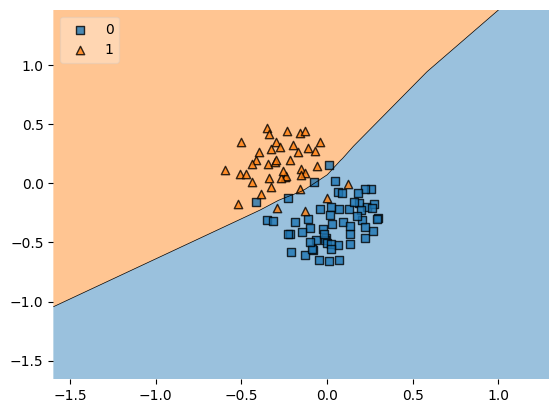

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)